# Imports

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [27]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

Text(0, 0.5, 'Interval frecuency')

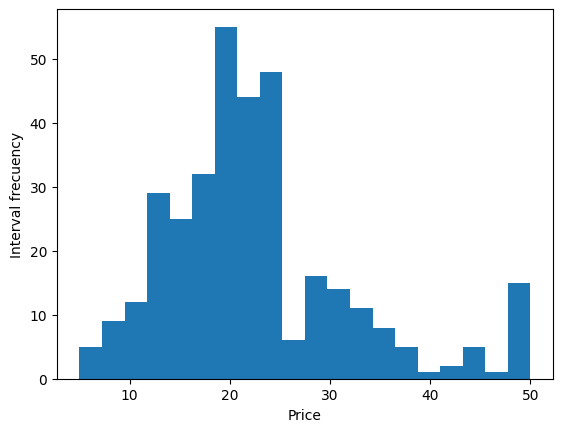

In [28]:
import matplotlib.pyplot as plt

n_bins = 20

# Generate two normal distributions
dist1 = y_train

fig, ax = plt.subplots(1, 1)

# We can set the number of bins with the *bins* keyword argument.
ax.hist(dist1, bins=n_bins)
ax.set_xlabel("Price")
ax.set_ylabel("Interval frecuency")

In [29]:
def dataRange(data):
  fdata = {}
  for (feature,i) in zip(np.transpose(data), range(1,data.shape[1]+1)):
    f = {}
    f["range"] = np.max(feature) - np.min(feature)
    f["min"] = np.min(feature)
    f["max"] = np.max(feature)
    fdata[("f"+str(i))] = f
  
  return fdata

In [30]:
dataRange(x_train)

{'f1': {'range': 67.91448, 'min': 0.00632, 'max': 67.9208},
 'f2': {'range': 100.0, 'min': 0.0, 'max': 100.0},
 'f3': {'range': 27.279999999999998, 'min': 0.46, 'max': 27.74},
 'f4': {'range': 1.0, 'min': 0.0, 'max': 1.0},
 'f5': {'range': 0.486, 'min': 0.385, 'max': 0.871},
 'f6': {'range': 5.164, 'min': 3.561, 'max': 8.725},
 'f7': {'range': 97.1, 'min': 2.9, 'max': 100.0},
 'f8': {'range': 9.5807, 'min': 1.1296, 'max': 10.7103},
 'f9': {'range': 23.0, 'min': 1.0, 'max': 24.0},
 'f10': {'range': 523.0, 'min': 188.0, 'max': 711.0},
 'f11': {'range': 9.4, 'min': 12.6, 'max': 22.0},
 'f12': {'range': 396.58, 'min': 0.32, 'max': 396.9},
 'f13': {'range': 36.24, 'min': 1.73, 'max': 37.97}}

# Preprocessing

In [31]:
# x normalization
x = np.concatenate((x_train, x_test),axis=0)
x_max = np.max(np.abs(x),axis=0)
x_train = x_train/x_max
x_test = x_test/x_max

# y normalization
y = np.concatenate((y_train, y_test),axis=0)
y_max = np.max(np.abs(y),axis=0)
y_train = y_train/y_max
y_test = y_test/y_max

# Training

In [32]:
from tensorflow.keras.layers import Dense

NUM_FEATURES = 13
NUM_NEURONS = 128
NUM_OUTPUTS = 1

input = keras.Input(shape=(NUM_FEATURES))
hidden = Dense(NUM_NEURONS, activation='relu')(input) 
hidden = Dense(NUM_NEURONS/2, activation='relu')(hidden) 
hidden = Dense(NUM_NEURONS/4, activation='relu')(hidden) 
hidden = Dense(NUM_NEURONS/8, activation='relu')(hidden) 
outputs = tf.keras.layers.Dense(NUM_OUTPUTS, activation='linear')(hidden)
model_base = tf.keras.Model(inputs=input, outputs=outputs) 
model_base.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1792      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable

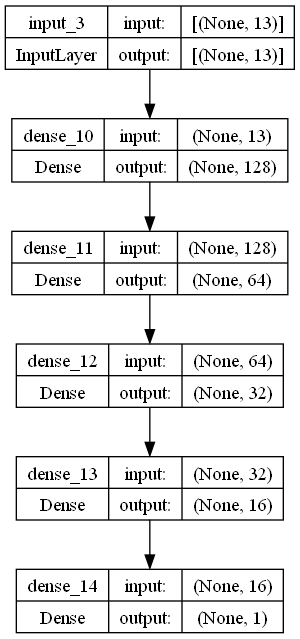

In [33]:
ifile = './tmp/model_1.png'
tf.keras.utils.plot_model (model_base, to_file = ifile, show_shapes = True, show_layer_names = True)

In [38]:
from keras.optimizers import Adam

optimizer = Adam()
model_base.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
history = model_base.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
9/9 [==============================] - 0s 17ms/step - loss: 0.0799 - MSE: 0.0147 - val_loss: 0.0722 - val_MSE: 0.0105
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0712 - MSE: 0.0121 - val_loss: 0.0690 - val_MSE: 0.0097
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0718 - MSE: 0.0121 - val_loss: 0.0597 - val_MSE: 0.0088
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0654 - MSE: 0.0110 - val_loss: 0.0590 - val_MSE: 0.0088
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0643 - MSE: 0.0104 - val_loss: 0.0555 - val_MSE: 0.0072
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0639 - MSE: 0.0091 - val_loss: 0.0561 - val_MSE: 0.0067
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0638 - MSE: 0.0096 - val_loss: 0.0547 - val_MSE: 0.0063
Epoch 8/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0631 - MSE: 0.0096 - val_loss: 

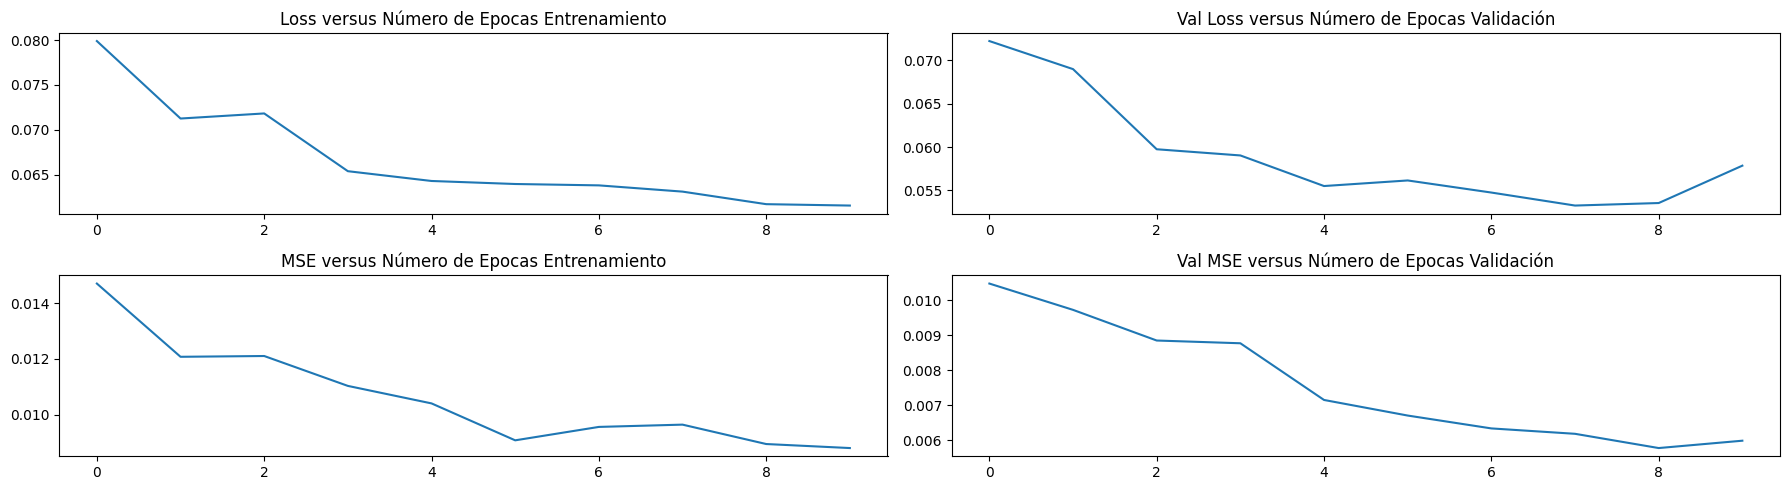

In [39]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2, 2, figsize=(18,5))
axis[0,0].plot(history.history['loss'], label='train loss')
axis[0,1].plot(history.history['val_loss'], label='val loss')
axis[1,0].plot(history.history['MSE'], label='train mse')
axis[1,1].plot(history.history['val_MSE'], label='val mse')
axis[0,0].set_title("Loss versus Número de Epocas Entrenamiento")
axis[0,1].set_title("Val Loss versus Número de Epocas Validación")
axis[1,0].set_title("MSE versus Número de Epocas Entrenamiento")
axis[1,1].set_title("Val MSE versus Número de Epocas Validación")
plt.tight_layout()
plt.show()